In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from datetime import date

In [ ]:
# Data from https://www.ncsbe.gov/results-data/voter-registration-data
# Downloaded 11/7/25

## Load the Watauga and NC datasets

In [2]:
# Loading the voter registration history

file = 'ncvhis95.txt'

turn_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['voted_party_cd', 'ncid', 'election_lbl'],
    encoding="latin-1",  
)

turn_df.head()

,election_lbl,voted_party_cd,ncid
0,11/08/2016,UNA,AA107731
1,03/15/2016,REP,AA108729
2,11/08/2022,REP,AA108729
3,11/06/2018,REP,AA108729
4,11/08/2016,REP,AA108729


In [3]:
# Loading the new voter registration's in WAT

file = 'ncvoter95.txt'

wat_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year', 'status_cd', 'precinct_desc', 'ncid'],
    encoding="latin-1",  
)


wat_df.head()

,ncid,status_cd,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc
0,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2
1,EL88159,D,28607.0,09/24/2015,W,NL,UNA,M,1996,NaN
2,EL93419,A,28604.0,04/11/2017,W,NL,DEM,F,1963,BEECH MOUNTAIN
3,EL94178,I,28607.0,08/24/2017,W,NL,DEM,F,1999,NEW RIVER III
4,EM142921,A,28607.0,10/25/2024,A,NL,UNA,M,2003,NEW RIVER I


In [4]:
wat_df.count()

ncid             56666
status_cd        56666
zip_code         45518
registr_dt       56666
race_code        56666
ethnic_code      56666
party_cd         56666
gender_code      56666
birth_year       56666
precinct_desc    44371
dtype: int64

In [5]:
merged = pd.merge(turn_df, wat_df, how = 'right', on = 'ncid', indicator = True)
merged.head()

,election_lbl,voted_party_cd,ncid,status_cd,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc,_merge
0,11/08/2022,UNA,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2,both
1,03/03/2020,DEM,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2,both
2,11/03/2020,UNA,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2,both
3,NaN,NaN,EL88159,D,28607.0,09/24/2015,W,NL,UNA,M,1996,NaN,right_only
4,11/06/2018,DEM,EL93419,A,28604.0,04/11/2017,W,NL,DEM,F,1963,BEECH MOUNTAIN,both


In [6]:
merged.count()

election_lbl      199459
voted_party_cd    199458
ncid              206107
status_cd         206107
zip_code          179711
registr_dt        206107
race_code         206107
ethnic_code       206107
party_cd          206107
gender_code       206107
birth_year        206107
precinct_desc     178565
_merge            206107
dtype: int64

In [7]:
merged = merged[merged['registr_dt'] != '##/##/####']
merged['registr_dt'] = pd.to_datetime(merged['registr_dt'])
merged['election_lbl'] = pd.to_datetime(merged['election_lbl'])
merged = merged.set_index('registr_dt')

merged_asc = merged.sort_index(ascending=True)
merged_asc.head(8)

,election_lbl,voted_party_cd,ncid,status_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc,_merge
registr_dt,,,,,,,,,,,,
1959-08-02,2016-11-08,REP,EL3581,R,NaN,W,NL,REP,F,1936,NaN,both
1964-10-08,2016-03-15,REP,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,both
1964-10-08,2016-11-08,REP,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,both
1964-10-08,2018-11-06,REP,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,both
1964-10-08,2020-11-03,REP,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,both
1964-10-08,2024-11-05,REP,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,both
1965-10-25,2018-05-08,REP,EL8405,R,NaN,W,NL,REP,F,1924,NaN,both
1965-10-25,2020-11-03,REP,EL8405,R,NaN,W,NL,REP,F,1924,NaN,both


In [8]:
file = 'ncvoter_Statewide.txt'

nc_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year', 'status_cd', 'precinct_desc', 'ncid'],
    encoding="latin-1",   
)

nc_df.count()

/var/folders/h9/j7mkgpm92nv0shny7rh1v93r0000gn/T/ipykernel_74360/497558280.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  nc_df = pd.read_csv(


ncid             8966557
status_cd        8966557
zip_code         7781761
registr_dt       8966557
race_code        8966557
ethnic_code      8966557
party_cd         8966557
gender_code      8966557
birth_year       8966557
precinct_desc    7600441
dtype: int64

## Clean and filter Watauga dataset

In [9]:
wat_df = wat_df[wat_df['registr_dt'] != '##/##/####']
wat_df['registr_dt'] = pd.to_datetime(wat_df['registr_dt'])
wat_df = wat_df.set_index('registr_dt')

wat_df_asc = wat_df.sort_index(ascending=True)
wat_df_asc.head()

,ncid,status_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc
registr_dt,,,,,,,,,
1959-08-02,EL3581,R,NaN,W,NL,REP,F,1936,NaN
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK
1965-10-25,EL8405,R,NaN,W,NL,REP,F,1924,NaN
1968-08-02,EL2157,A,28692.0,W,NL,REP,M,1938,BEAVER DAM
1968-10-25,EL4487,R,NaN,W,NL,REP,M,1943,NaN


In [10]:
wat_current = wat_df_asc.loc['2025-08-01':]
wat_past = wat_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(wat_past) - len(wat_current)) / len(wat_past)
print(f'The 2023 Watauga election had a registration count of {len(wat_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(wat_current)}; a {percent:.1%} decrease.')

The 2023 Watauga election had a registration count of 1889, while the 2025 election cycle had a registration count of 1574; a 16.7% decrease.


## Clean and filter NC dataset

In [11]:
nc_df = nc_df[nc_df['registr_dt'] != '##/##/####']
nc_df['registr_dt'] = pd.to_datetime(nc_df['registr_dt'])
nc_df = nc_df.set_index('registr_dt')

nc_df_asc = nc_df.sort_index(ascending=True)

In [12]:
nc_current = nc_df_asc.loc['2025-08-01':]
nc_past = nc_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(nc_past) - len(nc_current)) / len(nc_past)
print(f'The 2023 NC election had a new registration count of {len(nc_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(nc_current)}; a {percent:.1%} decrease.')

The 2023 NC election had a new registration count of 128182, while the 2025 election cycle had a registration count of 107407; a 16.2% decrease.


## Explore UNA demographics

<Axes: title={'center': 'NC Race'}>

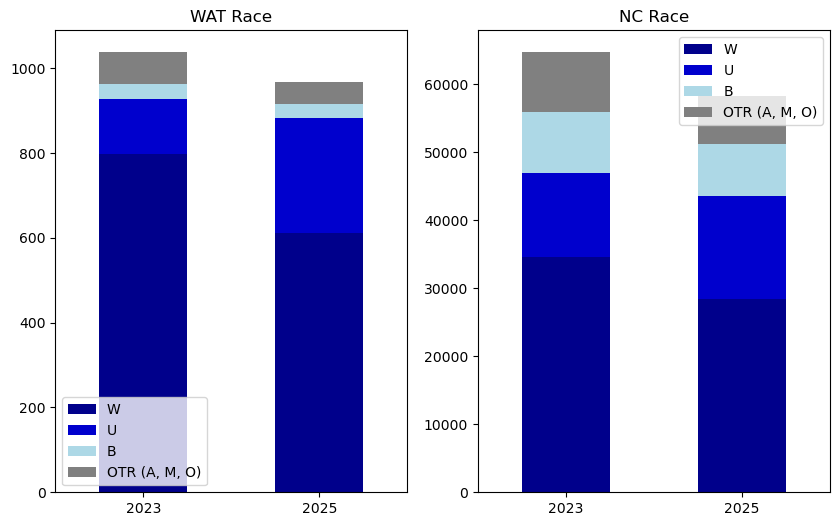

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

# Filter WAT and NC data set to just the UNA

una_wat_2025 = wat_current[wat_current['party_cd'] == 'UNA']
una_wat_2023 = wat_past[wat_past['party_cd'] == 'UNA']

una_nc_2025 = nc_current[nc_current['party_cd'] == 'UNA']
una_nc_2023 = nc_past[nc_past['party_cd'] == 'UNA']

# # Break down the race demographics of the WAT UNA during the 2023 election cycle
# # Break down the race demographics of the WAT UNA during the 2025 election cycle

wat_una_race_df = {
    '2023': una_wat_2023['race_code'].value_counts(),
    '2025': una_wat_2025['race_code'].value_counts()
}

wat_race_df = pd.DataFrame(wat_una_race_df)
wat_race = wat_race_df.T
wat_race['OTR (A, M, O)']= wat_race['I'] + wat_race['A'] + wat_race['M'] + wat_race['O']
wat_race = wat_race.drop(['I', 'A', 'M', 'O'], axis = 1)

wat_race.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Race', color = ['DarkBlue', 'MediumBlue', 'LightBlue', 'Grey'], rot = 0)

# # Break down the race demographics of the NC UNA during the 2023 election cycle
# # Break down the race demographics of the NC UNA during the 2025 election cycle

nc_una_race_df = {
    '2023': una_nc_2023['race_code'].value_counts(),
    '2025': una_nc_2025['race_code'].value_counts()
}

nc_race_df = pd.DataFrame(nc_una_race_df)
nc_race = nc_race_df.T
nc_race['OTR (A, M, O)']= nc_race['I'] + nc_race['A'] + nc_race['M'] + nc_race['O'] + nc_race['P']
nc_race = nc_race.drop(['I', 'A', 'M', 'O', 'P'], axis = 1)

nc_race.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Race', color = ['DarkBlue', 'MediumBlue', 'LightBlue', 'Grey'], rot = 0)


<Axes: title={'center': 'NC Gender'}>

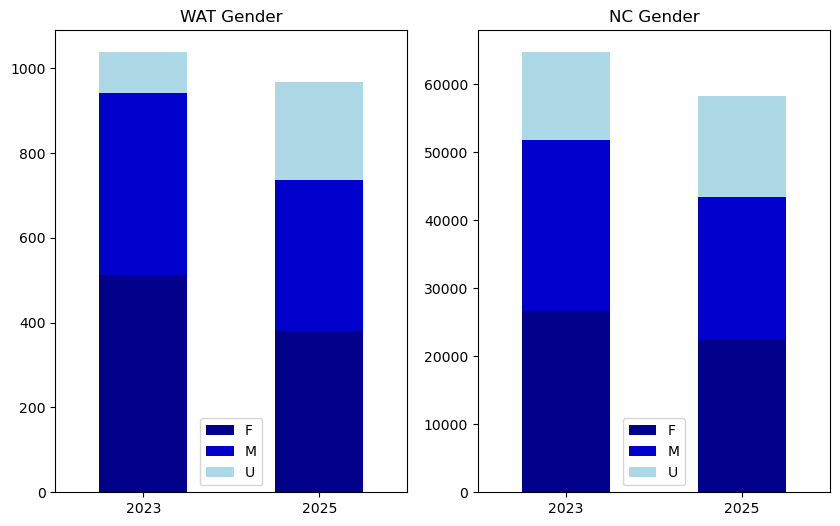

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

# # Break down the gender demographics of the WAT UNA during the 2023 election cycle
# # Break down the gender demographics of the WAT UNA during the 2025 election cycle

wat_una_gen_df = {
    '2023': una_wat_2023['gender_code'].value_counts(),
    '2025': una_wat_2025['gender_code'].value_counts()
}

wat_gen_df = pd.DataFrame(wat_una_gen_df)
wat_gen = wat_gen_df.T

wat_gen.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Gender', color = ['DarkBlue', 'MediumBlue', 'LightBlue'], rot = 0)

# # Break down the race demographics of the NC UNA during the 2023 election cycle
# # Break down the race demographics of the NC UNA during the 2025 election cycle

nc_una_gen_df = {
    '2023': una_nc_2023['gender_code'].value_counts(),
    '2025': una_nc_2025['gender_code'].value_counts()
}

nc_gen_df = pd.DataFrame(nc_una_gen_df)
nc_gen = nc_gen_df.T

nc_gen.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Gender', color = ['DarkBlue', 'MediumBlue', 'LightBlue'], rot = 0)



## Explore DEM demographics

<Axes: title={'center': 'NC Race'}>

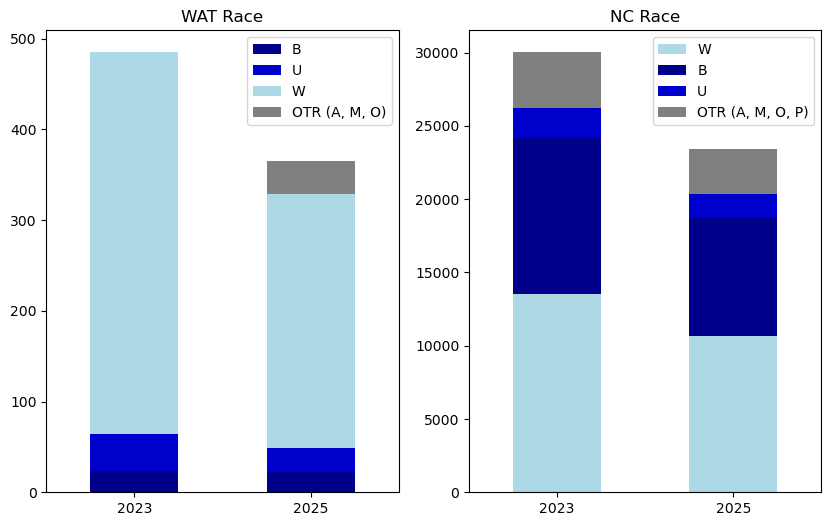

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

# Filter WAT and NC data set to just the DEM

dem_wat_2025 = wat_current[wat_current['party_cd'] == 'DEM']
dem_wat_2023 = wat_past[wat_past['party_cd'] == 'DEM']

dem_nc_2023 = nc_past[nc_past['party_cd'] == 'DEM']
dem_nc_2025 = nc_current[nc_current['party_cd'] == 'DEM']

# # Break down the race demographics of the WAT UNA during the 2023 election cycle
# # Break down the race demographics of the WAT UNA during the 2025 election cycle

wat_una_race_df = {
    '2023': dem_wat_2023['race_code'].value_counts(),
    '2025': dem_wat_2025['race_code'].value_counts()
}

wat_race_df = pd.DataFrame(wat_una_race_df)
wat_race = wat_race_df.T
wat_race['OTR (A, M, O)']= wat_race['I'] + wat_race['A'] + wat_race['M'] + wat_race['O']
wat_race = wat_race.drop(['I', 'A', 'M', 'O'], axis = 1)

wat_race.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Race', color = ['DarkBlue', 'MediumBlue', 'LightBlue', 'Grey'], rot = 0)

# # Break down the race demographics of the NC UNA during the 2023 election cycle
# # Break down the race demographics of the NC UNA during the 2025 election cycle

nc_una_race_df = {
    '2023': dem_nc_2023['race_code'].value_counts(),
    '2025': dem_nc_2025['race_code'].value_counts()
}

nc_race_df = pd.DataFrame(nc_una_race_df)
nc_race = nc_race_df.T
nc_race['OTR (A, M, O, P)']= nc_race['I'] + nc_race['A'] + nc_race['M'] + nc_race['O'] + nc_race['P']
nc_race = nc_race.drop(['I', 'A', 'M', 'O', 'P'], axis = 1)

nc_race.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Race', color = ['LightBlue', 'DarkBlue', 'MediumBlue', 'Grey'], rot = 0)



In [ ]:
# Break down the race demographics of the NC DEM during the 2023 election cycle
# Break down the gender demographics of the NC DEM during the 2023 election cycle


# Break down the race demographics of the NC DEM during the 2025 election cycle
# Break down the gender demographics of the NC DEM during the 2025 election cycle


## Group-by-precinct Watauga Dataset

In [24]:
merged_asc.groupby(['precinct_desc', 'election_lbl'], dropna = False)['ncid'].count().unstack('election_lbl').iloc[:, -13:]


election_lbl,2020-11-03,2021-10-05,2021-11-02,2022-05-17,2022-07-26,2022-11-08,2023-10-10,2023-11-07,2024-03-05,2024-05-14,2024-11-05,2025-09-09,NaT
precinct_desc,,,,,,,,,,,,,
BALD MOUNTAIN,427.0,NaN,1.0,137.0,NaN,356.0,NaN,NaN,157.0,12.0,455.0,NaN,35.0
BEAVER DAM,828.0,NaN,2.0,245.0,NaN,667.0,NaN,2.0,320.0,22.0,871.0,NaN,85.0
BEECH MOUNTAIN,356.0,NaN,44.0,105.0,1.0,308.0,NaN,155.0,143.0,17.0,384.0,NaN,71.0
BLOWING ROCK,2086.0,2.0,495.0,785.0,18.0,1756.0,2.0,642.0,934.0,69.0,2215.0,2.0,193.0
BLUE RIDGE,2710.0,NaN,96.0,950.0,10.0,2239.0,1.0,38.0,1205.0,66.0,3016.0,NaN,346.0
BOONE 1,982.0,NaN,277.0,327.0,5.0,820.0,NaN,173.0,380.0,3.0,1238.0,NaN,154.0
BOONE 2,644.0,NaN,87.0,128.0,12.0,532.0,1.0,98.0,290.0,7.0,1888.0,NaN,942.0
BOONE 3,604.0,1.0,126.0,172.0,14.0,563.0,3.0,126.0,327.0,6.0,2201.0,NaN,986.0
BRUSHY FORK,2247.0,2.0,69.0,564.0,13.0,1779.0,2.0,64.0,811.0,27.0,2869.0,NaN,332.0
